In [ ]:
pip install cpi

     |████████████████████████████████| 25.5 MB 26 kB/s 


In [ ]:
pip install quandl

In [ ]:
pip install chapter_3_utils

ERROR: Could not find a version that satisfies the requirement chapter_3_utils (from versions: none)
ERROR: No matching distribution found for chapter_3_utils


In [ ]:
import pandas as pd
import quandl
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

In [ ]:
quandl_key = 'sSthqzqxWjSwDSsYRDui'
quandl.ApiConfig.api_key = quandl_key
df = quandl.get(dataset = 'WGC/GOLD_MONAVG_USD', start_date = '2000-01-01',end_date = '2011-12-31')
df.rename (columns = {'Value':'price'}, inplace = True)
df.resample('M').last()
##main 데이터 확보* 필수 코드

,price
Date,
2000-01-31,284.31
2000-02-29,299.86
2000-03-31,286.39
2000-04-30,279.69
2000-05-31,275.19
...,...
2011-08-31,1755.81
2011-09-30,1771.85
2011-10-31,1665.21


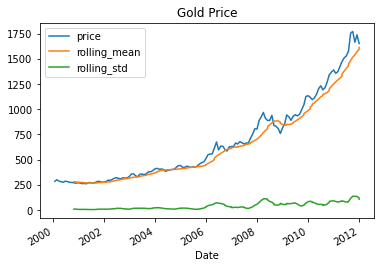

In [ ]:
WINDOW_SIZE = 12
df['rolling_mean'] = df.price.rolling(window = WINDOW_SIZE).mean()
df['rolling_std'] = df.price.rolling(window=WINDOW_SIZE).std()
df.plot(title = 'Gold Price')

In [7]:
decomposition_results = seasonal_decompose(df['price'], model = 'multiplicative')
decomposition_results.plot()
decomposition_results.suptitle('Multiplicative Decomposition',fontsize = 18);

NameError: ignored

In [ ]:
cpi.update()

In [ ]:
def adf_test(x):
    
    indices = ['Test Statistic', 'p-value',
               '# of Lags Used', '# of Observations Used']
    adf_test = adfuller(x, autolag='AIC')
    #if 'AIC' (default) or 'BIC', then the number of lags is chosen to minimize the corresponding information criterion
    #AIC가 디폴트 값인데, lag의 수준을 최적화하는 것으로 보면 됨.

    results = pd.Series(adf_test[0:4], index=indices)
    for key, value in adf_test[4].items():
        results[f'Critical Value ({key})'] = value

    return results

#함수를 생성하는 것임. ADF 검정을 시행하는 것으로 리턴 값은 아래와 같음.
#P값이 0.99에 육박하는 것을 보면 데이터가 비정상적이라는 귀무가설을 기각할 수 없음. 
#따라서 금 가격에 대한 데이터는 non-stionary한 것을 알 수 있음.
#Critical value를 보면 검정통계량과 비교할 수 있음. 
#만약 검정통계량이 -2.5677미만이라면 10%의 유의수준에서 H_0을 기각할 수 있다는 의미임.

In [ ]:
def kpss_test(x, h0_type='c'):

    indices = ['Test Statistic', 'p-value', '# of Lags']
    kpss_test = kpss(x, regression=h0_type)

    # regrssion = c or ct로 설정할 수 있음. 
    #c=contant : 해당 데이터가 정상성이 없다는 귀무가설에 해당함.
    #ct=data is stationary around a trend lags : 해당 데이터에 트랜드를 제거하는 것이 정상성을 만드는 방법
    results = pd.Series(kpss_test[0:3], index=indices)
    for key, value in kpss_test[3].items():
        results[f'Critical Value ({key})'] = value

    return results


In [ ]:
import cpi
import pandas as pd
from datetime import date
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss #정상성 테스트 검증법
#5번부터 하는 장소 입니다. 이따가 옮길 거임

In [ ]:
def autocorrelation_test(x):
  print('adf_test P-value : %1.5f' % adf_test(x)[1])
  print('kpss_test P-value : %1.5f' % kpss_test(x)[1])
#각각의 테스트를 통해 상관관계 계산. 상관성을 도출하겠다

In [ ]:
DEFL_date = date(2011,12,31)

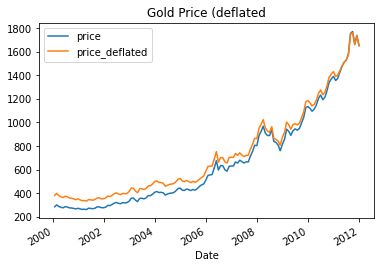

In [ ]:
df['dt_index']=df.index.map(lambda x : x.to_pydatetime().date())
df['price_deflated'] = df.apply(lambda x: cpi.inflate(x.price,x.dt_index,DEFL_date),axis = 1)
df[['price','price_deflated']].plot(title = 'Gold Price (deflated')

In [ ]:
autocorrelation_test(df.price_deflated)
#이걸 통해 adf와 kpss 에서 유의성이 얼마인지를 알려준다. 각각의 test를 실행해서 추가적인 데이터를 얻어도 좋다

adf_test P-value : 1.00000
kpss_test P-value : 0.01000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


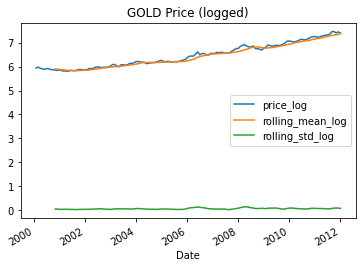

In [ ]:
WINDOW = 12
selected_columns = ['price_log','rolling_mean_log','rolling_std_log']
df['price_log'] = np.log(df.price_deflated)
df['rolling_mean_log'] = df.price_log.rolling(window = WINDOW).mean()
df['rolling_std_log'] = df.price_log.rolling(window = WINDOW).std()
df[selected_columns].plot(title = 'GOLD Price (logged)')

In [ ]:
autocorrelation_test(df.price_log)#유의성이 아직은 부족하다 두 수치가 아직도 유사하지 않다

adf_test P-value : 0.99276
kpss_test P-value : 0.01000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


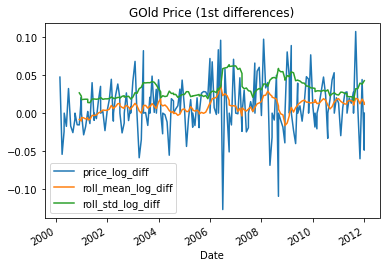

In [ ]:
selected_columns = ['price_log_diff','roll_mean_log_diff','roll_std_log_diff']
df['price_log_diff'] = df.price_log.diff(1)
df['roll_mean_log_diff'] = df.price_log_diff.rolling(WINDOW).mean()
df['roll_std_log_diff'] = df.price_log_diff.rolling(WINDOW).std()
df[selected_columns].plot(title = 'GOld Price (1st differences)')

In [ ]:
autocorrelation_test(df.price_log_diff.dropna()) #차분은 첫 항이na이므로 없애줘야 한다 
#유사한 값이 나옴을 볼 수 있다.
#adf kpss 한번씩 각각 돌려볼 수 있도록

adf_test P-value : 0.00000
kpss_test P-value : 0.09126


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


In [ ]:
#여기서 부터는 계절성을 넣어서 판독하는 방법이다

SyntaxError: ignored

In [3]:
pip install pmdarima

     |████████████████████████████████| 1.5 MB 27.1 MB/s 
     |████████████████████████████████| 9.5 MB 43.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [4]:
import pandas as pd


In [5]:
import pmdarima

In [6]:
from pmdarima.arima import ndifss, nsdiffs

ImportError: ignored

In [ ]:
#안되니까 바로 practice 6

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 8.1 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=2174205aeb45ca2c9b50bb63a3d9ac5f2760848a0e83831af5dc2cfae3350b62
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.set_cmap('cubehelix')
sns.set_palette('cubehelix')
COLORS = [plt.cm.cubehelix(x) for x in [0.1,0.3,0.5,0.7,]]

<Figure size 432x288 with 0 Axes>

In [ ]:
import yfinance as yf
from statsmodels.tsa.holtwinters import (ExponentialSmoothing, SimpleExpSmoothing, Holt)

In [ ]:
df = yf.download('GOOG', start = '2010-01-01',end = '2018-12-31',adjusted = True, progress= False)

In [ ]:
goog = df.resample('M').last().rename(columns = {'Adj Close': 'adj_close'}).adj_close


In [ ]:
train_indices = goog.index.year<2018
goog_train = goog[train_indices]
goog_test = goog[~train_indices]
test_length = len(goog_test)

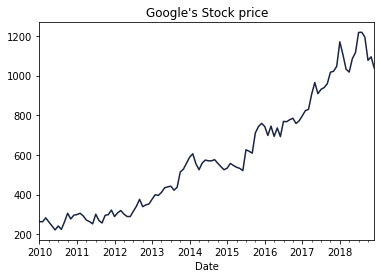

In [ ]:
goog.plot(title = "Google's Stock price")

In [ ]:
#세가지 모델 만들고 예측 생성할것임
ses_1 = SimpleExpSmoothing(goog_train).fit(smoothing_level = 0.2)
ses_forecast_1 = ses_1.forecast(test_length)
ses_2 = SimpleExpSmoothing(goog_train).fit(smoothing_level = 0.5)
ses_forecast_2 = ses_2.forecast(test_length)
ses_3 = SimpleExpSmoothing(goog_train).fit()
alpha = ses_3.model.params['smoothing_level']
ses_forecast_3 = ses_3.forecast(test_length)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


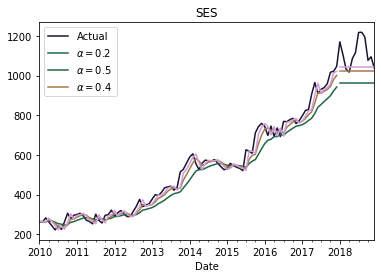

In [ ]:
goog.plot(color = COLORS[0], title = 'SES', label = 'Actual', legend = True)
ses_forecast_1.plot(color= COLORS[1],legend = True, label = r'$\alpha = 0.2$')
ses_1.fittedvalues.plot(color = COLORS[1])
ses_forecast_2.plot(color= COLORS[2],legend = True, label = r'$\alpha = 0.5$')
ses_2.fittedvalues.plot(color = COLORS[2])
ses_forecast_3.plot(color= COLORS[3],legend = True, label = r'$\alpha = 0.4$')
ses_3.fittedvalues.plot(color = COLORS[3])

홀트로는 어떻게 작동하는지 보자

In [ ]:
hs_1 = Holt(goog_train).fit()
hs_forecast_1 = hs_1.forecast(test_length)

hs_2 = Holt(goog_train, exponential=True).fit()
hs_forecast_2 = hs_2.forecast(test_length)

hs_3 = Holt(goog_train, exponential=False, damped_trend = True).fit(damping_trend = 0.99)
hs_forecast_3 = hs_3.forecast(test_length)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


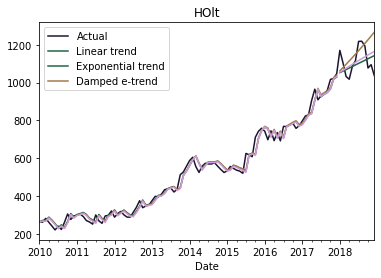

In [ ]:
goog.plot(color = COLORS[0], title = 'HOlt', label = 'Actual', legend = True)
hs_forecast_1.plot(color= COLORS[1],legend = True, label = 'Linear trend')
hs_1.fittedvalues.plot(color = COLORS[1])
hs_forecast_2.plot(color= COLORS[2],legend = True, label = 'Exponential trend')
hs_2.fittedvalues.plot(color = COLORS[2])
hs_forecast_3.plot(color= COLORS[3],legend = True, label = 'Damped e-trend')
hs_3.fittedvalues.plot(color = COLORS[3])

In [ ]:
hw_1 = ExponentialSmoothing(goog_train,trend = 'mul', seasonal = 'add', seasonal_periods=12).fit()
hw_forecast_1 = hw_1.forecast(test_length)

hw_2 = ExponentialSmoothing(goog_train,trend = 'mul', seasonal = 'add', seasonal_periods=12,damped_trend = True).fit()
hw_forecast_2 = hw_2.forecast(test_length)



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


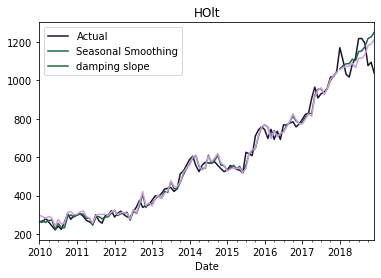

In [ ]:
goog.plot(color = COLORS[0], title = 'HOlt', label = 'Actual', legend = True)
hw_forecast_1.plot(color= COLORS[1],legend = True, label = 'Seasonal Smoothing')
hw_1.fittedvalues.plot(color = COLORS[1])

hw_forecast_2.plot(color= COLORS[3],legend = True, label = 'damping slope')
hw_2.fittedvalues.plot(color = COLORS[3])